# Plot full North American DTA tree with baltic

February 2, 2024

In [1]:
import sys, subprocess, glob, os, shutil, re, importlib
from subprocess import call
import json
import imp
bt = imp.load_source('baltic', '../../baltic/baltic/baltic.py')

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import matplotlib.colors as clr
from matplotlib import rc
import textwrap as textwrap
from textwrap import wrap

import numpy as np
import pandas as pd
#from scipy.special import binom

import rpy2
%load_ext rpy2.ipython

from scipy.stats import ttest_ind

/var/folders/pq/2r34219j1gqfwwbv1ks0440w0000gr/T/ipykernel_71272/3216954.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': 22})

In [3]:
from datetime import date

todays_date = str(date.today())
print(todays_date)

2024-03-21


In [4]:
# to run on 1 json

# this is for the wild/domestic analysis, where wild and domestic are equal 
tree_path = 'Lambos-BEAST-analyses/RF_Wbyb_1_1.MCC.tree'

In [5]:
tree=bt.loadNexus(tree_path)

In [6]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [7]:
def return_height_most_recent_tip(tree):
    all_heights = []
    
    for k in tree.Objects: 
        if k.branchType == "leaf":
            height = k.traits["height"]
            all_heights.append(height)
            
    height_youngest_tip = min(all_heights)
    return(height_youngest_tip)

In [8]:
def return_date_most_recent_tip(tree, height_youngest_tip):
    
    for k in tree.Objects: 
        if k.branchType == "leaf":
            height = k.traits["height"]
            if height == height_youngest_tip:
                date_string = k.name.split("|")[2]
                date_format = '%Y-%m-%d'

                date_obj = dt.strptime(date_string, date_format)
                decimal_date = toYearFraction(date_obj)
                
                return(decimal_date)

In [9]:
height_youngest_tip = return_height_most_recent_tip(tree)
age_youngest_tip = return_date_most_recent_tip(tree, height_youngest_tip)
print(age_youngest_tip)

2023.3916666666667


In [10]:
def return_counts_of_traits_in_tree(tree,traitName):
    trait_counts = {}

    for k in tree.Objects: 
        if k.branchType == "leaf":
            #print(k.traits)
            trait_type = k.traits[traitName]
            if trait_type not in trait_counts: 
                trait_counts[trait_type] = 1
            else: 
                trait_counts[trait_type] += 1

    return(trait_counts)

In [11]:
traitName = "domwild"

domwild_counts = return_counts_of_traits_in_tree(tree,traitName)
print(domwild_counts)

{'Domestic': 270, 'Wild': 270}


In [12]:
# migration_counts = return_counts_of_traits_in_tree(tree, "Migration")
# order_counts = return_counts_of_traits_in_tree(tree, "order_condensed")

# print(migration_counts)
# print(order_counts)

In [13]:
# try instead, clustering into regions and plotting it that way; we could do: west, 2 midwests, 2 souths, northeast

colors = {"Domestic":"#DC8A36", # orange
          "Wild":"#2664A5", 
          "Commercial":"#B2313D",
          "Backyard_bird":"#D1BA56"
         }


uncertainty_color="#F6F6F6"

color_order_migration = ["wild_migratory","wild_partially_migratory","wild_sedentary",
               "domestic","nonhuman_mammal"]

color_order_orders = ["anseriformes","charadriiformes","accipitriformes","passeriformes","strigiformes",
                      "galliformes","nonhuman-mammal"]

color_order_domwild = ["wild","domestic","nonhuman-mammal"]
color_order_domwild_byb = ["Wild","Domestic","Backyard_bird"]
color_order_domwild_byb = ["Wild","Domestic"]

In [87]:
traitName = "domwild"
filename_domwild = "figures/wild-domestic-1-1-rarefaction-dta-"+traitName+"-"+todays_date+".pdf"

In [88]:
def return_node_color(k, colors):
    node_colors = clr.LinearSegmentedColormap.from_list('custom ', [colors["Domestic"], colors["Wild"]], N=256)

    k_prob = k.traits[traitName+'.prob']
    k_trait = k.traits[traitName]
    
    if k_trait == "Domestic":
        k_prob = 1 - k_prob
        k_color = node_colors(k_prob)
    elif k_trait == "Wild":
        k_prob = k_prob
        k_color = node_colors(k_prob)
    elif k_trait == "ancestor":  # if at root
        k_prob = k_prob
        k_color = "#969997"

    return(k_color)

[2021.583, 2021.6660000000002, 2021.7490000000003, 2021.8320000000003, 2021.9150000000004, 2021.9980000000005, 2022.0810000000006, 2022.1640000000007, 2022.2470000000008, 2022.3300000000008, 2022.413000000001, 2022.496000000001, 2022.579000000001, 2022.6620000000012, 2022.7450000000013, 2022.8280000000013, 2022.9110000000014, 2022.9940000000015, 2023.0770000000016, 2023.1600000000017, 2023.2430000000018, 2023.3260000000018, 2023.409000000002, 2023.492000000002]
[2021.583, 2021.7490000000003, 2021.9150000000004, 2022.0810000000006, 2022.2470000000008, 2022.413000000001, 2022.579000000001, 2022.7450000000013, 2022.9110000000014, 2023.0770000000016, 2023.2430000000018, 2023.409000000002]


/var/folders/pq/2r34219j1gqfwwbv1ks0440w0000gr/T/ipykernel_89789/433334543.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


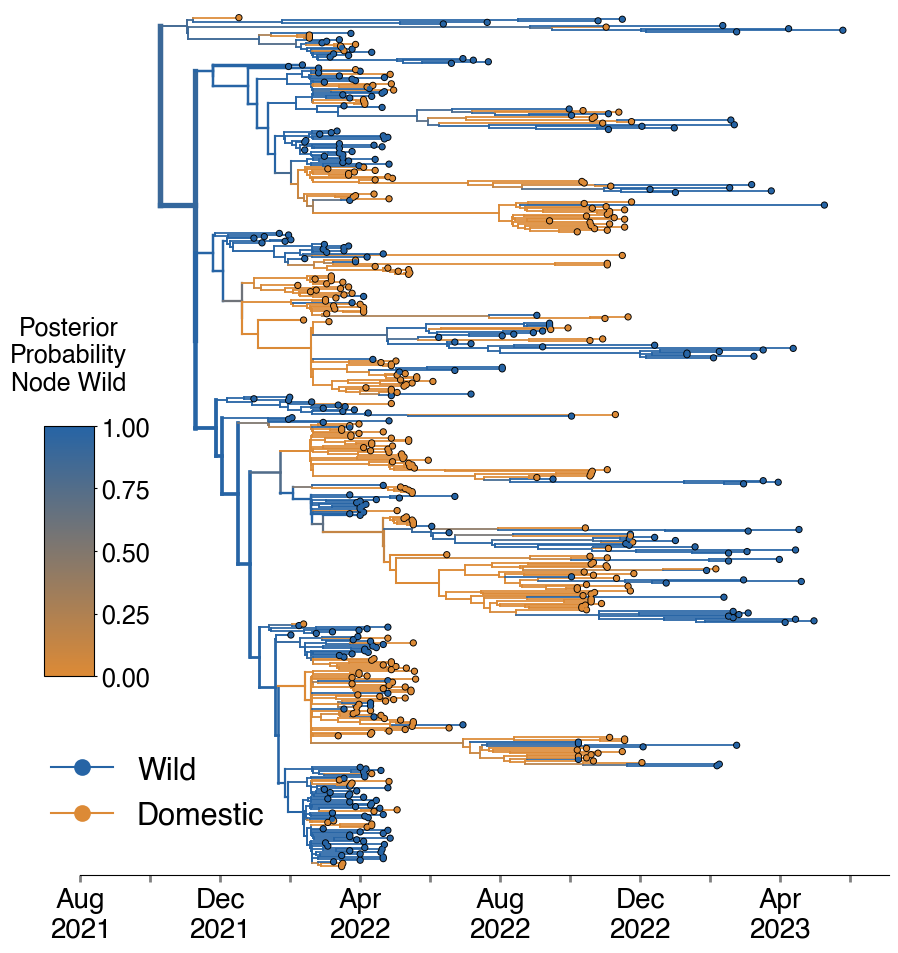

In [89]:
fig,ax = plt.subplots(figsize=(10,10),facecolor='w')

# # this sets the vertical dashed lines on the tree; plot a dashed line every other year from 1990 to 2020
#dates_ls = [,2021.83,2021.917,2022,2022.083,2022.166,2022.249,2022.332,2022.415, 2022.498]
dates_ls = []
for i in np.arange(2021.583,2023.5,0.083):
    dates_ls.append(i)  
print(dates_ls)
dates_ls = dates_ls[::2]
print(dates_ls)
#[ax.axvline(i,ls='--',lw=2,color='grey',zorder=0, alpha=0.6) for i in dates]

#set date labels to be every 4
# date_labels = []
# for d in dates_ls[::4]:
#     date_labels.append(str(d))
#     if d < 2018:
#         date_labels.append("")

branchWidth=1.25 ## default branch width
tipSize = 15
    
# k objects are tips, nodes, branches
for k in tree.Objects: ## iterate over objects in tree
    x=k.absoluteTime ## or use absolute time instead
    y=k.y 
    
    xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
    
    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        traitValue = k.traits[traitName]
        traitProb = k.traits[traitName+".prob"]
        traitProbAlpha = (traitProb-0.5)*2
        c = return_node_color(k, colors)
#         base_color=colors[traitValue]
#         color_ramp = clr.LinearSegmentedColormap.from_list('custom ', [uncertainty_color,base_color], N=256)
#        c = color_ramp(traitProbColor)
        s=tipSize
        
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    
    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        number_children = len(k.leaves)
        node_branchwidth = branchWidth + number_children*0.005
        
        traitValue = k.traits[traitName]
        traitProb = k.traits[traitName+".prob"]
        traitProbAlpha = 1 #traitProb # (traitProb-0.5)*2
#         base_color=colors[traitValue]
#         color_ramp = clr.LinearSegmentedColormap.from_list('custom ', [uncertainty_color, base_color], N=256)
#         c = color_ramp(traitProbColor)
        c = return_node_color(k, colors)

        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=node_branchwidth,color=c,alpha=traitProbAlpha, ls='-',zorder=9) #color=node_colors[node_types[k]["node_community_status"]]
        
    ax.plot([xp,x],[y,y],lw=node_branchwidth,color=c,alpha=traitProbAlpha, ls='-',zorder=9)
        
    # add in a legend
    han_list = []

    # bbox to anchor puts a bounding box around where you want the legend to go, prop part is for text size
for key in color_order_domwild_byb:
    marker = mlines.Line2D(range(1), range(1), color = colors[key], marker='o', markerfacecolor = colors[key], label = key.replace("_"," ").title().replace("bird","Bird"), markersize = 10, markeredgewidth=2)
    han_list.append(marker)

node_colors1 = clr.LinearSegmentedColormap.from_list('custom ', [colors["Domestic"], colors["Wild"]], N=256)

# put in color bar
# these coordinates are right, bottom, width, length
ax2 = fig.add_axes([0.035, 0.30, 0.05, 0.25])   
mpl.colorbar.ColorbarBase(ax2, cmap=node_colors1, ticks=np.linspace(0.0,1.0,5))
ax2.tick_params(size=2,labelsize=18)
ax2.set_title('Posterior\nProbability\nNode Wild\n', size=18)
#ax2.set_label_coords(-0.1,1.02)
    
     
    
    
# set axis limits, remove border lines         
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

ax.set_ylim(-5,tree.ySpan+5)
ax.set_xlim(2021.83,2023.5)
ax.tick_params(axis='y',labelsize=0,size=0)
ax.tick_params(axis='x',labelsize=20,size=5, width=2,color='grey')
ax.set_xticks(dates_ls)
ax.set_xticklabels(["Aug\n2021","","Dec\n2021","","Apr\n2022","","Aug\n2022","","Dec\n2022","","Apr\n2023",""])   # set date labels every 4
#ax.set_xticklabels(["Aug\n2021","Oct\n2021","Dec\n2021","Feb\n2022","Apr\n2022","Jun\n2022","Aug\n2022","Oct\n2022","Dec\n2022","Feb\n2023","Apr\n2023","Jun\n2023"])   # set date labels every 4
ax.set_yticklabels([])

# in order to get the legend to plot without being transparent, over the plot, it needs to be here with frame set to true
# bbox arguments are: x, y, with 0 being furthest left and bottom
ax.legend(handles = han_list, markerfirst = True, edgecolor="white", framealpha=1, bbox_to_anchor=[-0.07, 0.02], loc=3,prop={'size': 22}, facecolor='w')

fig.tight_layout()
plt.gcf().subplots_adjust(right=0.88)
plt.savefig(filename_domwild)

plt.show()

# Plot Wild, Byb, Commercial Rarefaction tree 

In [14]:
# this is for the wild/byb/commercial rarefaction analysis
tree_path_100 = 'Lambos-BEAST-analyses/RF-wild-1_1_100.anot.tree'

# this is for the wild/byb/commercial rarefaction analysis
tree_path_25 = 'Lambos-BEAST-analyses/RF-wild2-1_1_25.MCC.tree'

In [15]:
tree_path = tree_path_100
tree=bt.loadNexus(tree_path)

In [16]:
height_youngest_tip = return_height_most_recent_tip(tree)
age_youngest_tip = return_date_most_recent_tip(tree, height_youngest_tip)
print(age_youngest_tip)

2022.4930365296805


In [17]:
traitName = "domwildbyb"
#traitName = "domwild"

domwild_counts = return_counts_of_traits_in_tree(tree,traitName)
print(domwild_counts)

{'Wild': 772, 'Backyard_bird': 85, 'Domestic': 85}


In [18]:
# for k in tree.Objects: 
#     if k.branchType == "node":
#         if len(k.traits["domwildbyb.set"]) > 2:
#             print(k, k.traits["domwildbyb.set"], k.traits["domwildbyb.set.prob"])

In [275]:
a = 0.01 
b = 0.05 
c = 0.99
x = [a,b,c]

print(min(x))
print(x.index(min(x)))
print(max(x))
print(x.index(max(x)))


0.01
0
0.99
2


In [276]:
def return_node_color(k, traitName, colors):
    
    prob_wild = float(k.traits["domwildbyb.set.prob"][0])
    prob_dom = float(k.traits["domwildbyb.set.prob"][1])
    prob_byb = float(k.traits["domwildbyb.set.prob"][2])
    
    highest_prob = 
    
    node_colors = clr.LinearSegmentedColormap.from_list('custom ', [colors["Domestic"], colors["Wild"]], N=256)

    k_prob = k.traits[traitName+'.prob']
    k_trait = k.traits[traitName]
    
    if k_trait == "Domestic":
        k_prob = 1 - k_prob
        k_color = node_colors(k_prob)
    elif k_trait == "Wild":
        k_prob = k_prob
        k_color = node_colors(k_prob)
    elif k_trait == "ancestor":  # if at root
        k_prob = k_prob
        k_color = "#969997"

    return(k_color)

SyntaxError: invalid syntax (4091457491.py, line 7)

In [19]:
# try instead, clustering into regions and plotting it that way; we could do: west, 2 midwests, 2 souths, northeast
colors = {"Domestic":"#C6533E", # setting domestic to be red
          "Wild":"#2664A5", 
          "nonhuman_mammal":"#B2313D",
          "Backyard_bird":"#D1BA56"
         }

colors = {"Domestic":"#5CA7A4",  #"#5CA7A4", #setting domestic to be green; # purple: #BE778B
          "Wild":"#2664A5", 
          "nonhuman_mammal":"#B2313D",
          "Backyard_bird":"#D1BA56"
         }


colors_same_domestic = {"Domestic":"#DC8A36", #"#5CA7A4", #green color
          "Wild":"#2664A5", 
          "nonhuman_mammal":"#B2313D",
          "Backyard_bird":"#DC8A36"
         }

uncertainty_color="#F6F6F6"

color_order_migration = ["wild_migratory","wild_partially_migratory","wild_sedentary",
               "domestic","nonhuman_mammal"]

color_order_orders = ["anseriformes","charadriiformes","accipitriformes","passeriformes","strigiformes",
                      "galliformes","nonhuman-mammal"]

color_order_domwild = ["wild","domestic","nonhuman-mammal"]
color_order_domwildbyb = ["Wild","Domestic","Backyard_bird"]
color_order_same_domestic = ["Wild","Domestic"]

## First, plot with all 3 colors 

In [20]:
# set output filename
traitName = "domwildbyb"
filename_domwild = "figures/wilddombyb-rarefaction-1-1-100-"+todays_date+".pdf"

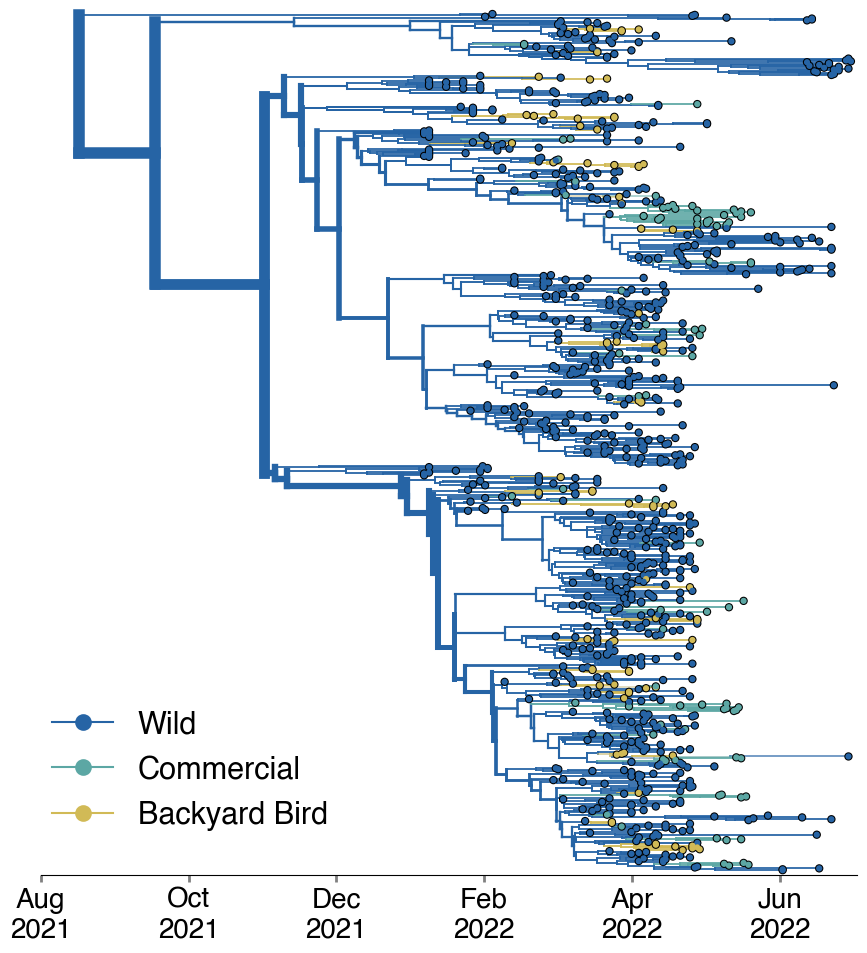

In [21]:
fig,ax = plt.subplots(figsize=(10,10),facecolor='w')

# # this sets the vertical dashed lines on the tree; plot a dashed line every other year from 1990 to 2020
#dates_ls = [,2021.83,2021.917,2022,2022.083,2022.166,2022.249,2022.332,2022.415, 2022.498]
dates_ls = []
for i in np.arange(2021.583,2022.5,0.083):
    dates_ls.append(i)  
dates_ls = dates_ls[::2]

branchWidth=1.25 ## default branch width
tipSize = 20
    
# k objects are tips, nodes, branches
for k in tree.Objects: ## iterate over objects in tree
    x=k.absoluteTime ## or use absolute time instead
    y=k.y 
    
    xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
    
    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        traitValue = k.traits[traitName]
        traitProb = k.traits[traitName+".prob"]
        base_color=colors[traitValue]
        color_ramp = clr.LinearSegmentedColormap.from_list('custom ', ["#B9B9B9",base_color], N=256)
        c = color_ramp(traitProb)
        s=tipSize
        
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    
    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        number_children = len(k.leaves)
        node_branchwidth = branchWidth + number_children*0.0075
        
        traitValue = k.traits[traitName]
        traitProb = k.traits[traitName+".prob"]
        traitProbAlpha = traitProb
        base_color=colors[traitValue]
        color_ramp = clr.LinearSegmentedColormap.from_list('custom ', ["#B9B9B9", base_color], N=256)
        c = color_ramp(traitProb)
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=node_branchwidth,color=c,alpha=traitProbAlpha,ls='-',zorder=9) #color=node_colors[node_types[k]["node_community_status"]]
        
    ax.plot([xp,x],[y,y],lw=node_branchwidth,color=c,alpha=traitProbAlpha,ls='-',zorder=9)
        
    # add in a legend
    han_list = []

    # bbox to anchor puts a bounding box around where you want the legend to go, prop part is for text size
for key in color_order_domwildbyb:
    marker = mlines.Line2D(range(1), range(1), color = colors[key], marker='o', markerfacecolor = colors[key], label = key.replace("_"," ").title().replace("Domestic","Commercial"), markersize = 10, markeredgewidth=2)
    han_list.append(marker)

# set axis limits, remove border lines         
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

ax.set_ylim(-5,tree.ySpan+5)
ax.set_xlim(2021.83,2022.5)
ax.tick_params(axis='y',labelsize=0,size=0)
ax.tick_params(axis='x',labelsize=20,size=5, width=2,color='grey')
ax.set_xticks(dates_ls)
ax.set_xticklabels(["Aug\n2021","Oct\n2021","Dec\n2021","Feb\n2022","Apr\n2022","Jun\n2022"])   # set date labels every 4
ax.set_yticklabels([])

# in order to get the legend to plot without being transparent, over the plot, it needs to be here with frame set to true
# bbox arguments are: x, y, with 0 being furthest left and bottom
ax.legend(handles = han_list, markerfirst = True, edgecolor="white", framealpha=1, bbox_to_anchor=[-0.02, 0.02], loc=3,prop={'size': 22}, facecolor='w')

fig.tight_layout()
plt.gcf().subplots_adjust(right=0.88)
plt.savefig(filename_domwild)

plt.show()

## Also plot with commercial and backyard the same color 

In [22]:
colors_same_domestic = {"Domestic":"#5CA7A4", #"#5CA7A4", #green color; orange: "#DC8A36"
          "Wild":"#2664A5", 
          "nonhuman_mammal":"#B2313D",
          "Backyard_bird":"#5CA7A4"
         }

uncertainty_color="#F6F6F6"

color_order_same_domestic = ["Wild","Domestic"]

In [23]:
# set output filename
traitName = "domwildbyb"
filename_domwild = "figures/wilddombyb-rarefaction-1-1-100-colorsame-"+todays_date+".pdf"

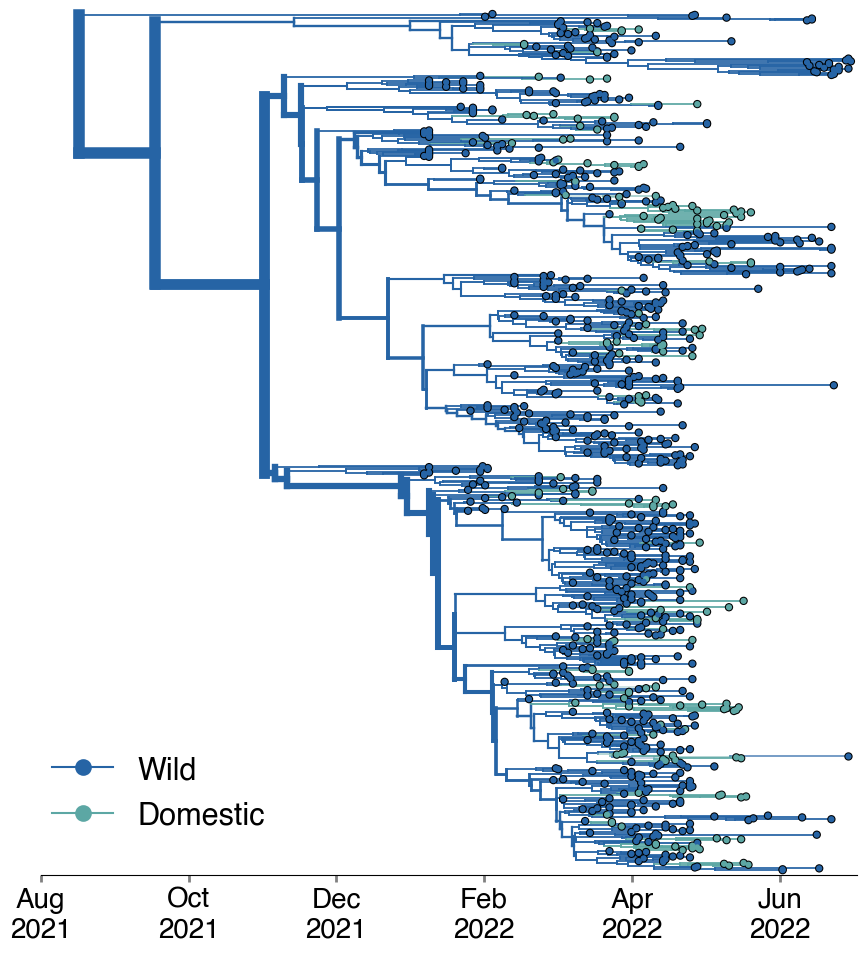

In [282]:
fig,ax = plt.subplots(figsize=(10,10),facecolor='w')

# # this sets the vertical dashed lines on the tree; plot a dashed line every other year from 1990 to 2020
#dates_ls = [,2021.83,2021.917,2022,2022.083,2022.166,2022.249,2022.332,2022.415, 2022.498]
dates_ls = []
for i in np.arange(2021.583,2022.5,0.083):
    dates_ls.append(i)  
dates_ls = dates_ls[::2]

branchWidth=1.25 ## default branch width
tipSize = 20
    
# k objects are tips, nodes, branches
for k in tree.Objects: ## iterate over objects in tree
    x=k.absoluteTime ## or use absolute time instead
    y=k.y 
    
    xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x
    
    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        traitValue = k.traits[traitName]
        traitProb = k.traits[traitName+".prob"]
        base_color=colors_same_domestic[traitValue]
        color_ramp = clr.LinearSegmentedColormap.from_list('custom ', [uncertainty_color,base_color], N=256)
        c = color_ramp(traitProb)
        s=tipSize
        
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    
    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        number_children = len(k.leaves)
        node_branchwidth = branchWidth + number_children*0.0075
        
        traitValue = k.traits[traitName]
        traitProb = k.traits[traitName+".prob"]
        traitProbAlpha = traitProb
        base_color=colors_same_domestic[traitValue]
        color_ramp = clr.LinearSegmentedColormap.from_list('custom ', [uncertainty_color, base_color], N=256)
        c = color_ramp(traitProb)
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=node_branchwidth,color=c,alpha=traitProbAlpha,ls='-',zorder=9) #color=node_colors[node_types[k]["node_community_status"]]
        
    ax.plot([xp,x],[y,y],lw=node_branchwidth,color=c,alpha=traitProbAlpha,ls='-',zorder=9)
        
    # add in a legend
    han_list = []

    # bbox to anchor puts a bounding box around where you want the legend to go, prop part is for text size
for key in color_order_same_domestic:
    marker = mlines.Line2D(range(1), range(1), color = colors_same_domestic[key], marker='o', markerfacecolor = colors_same_domestic[key], label = key.replace("_"," ").title(), markersize = 10, markeredgewidth=2)
    han_list.append(marker)

# set axis limits, remove border lines         
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

ax.set_ylim(-5,tree.ySpan+5)
ax.set_xlim(2021.83,2022.5)
ax.tick_params(axis='y',labelsize=0,size=0)
ax.tick_params(axis='x',labelsize=20,size=5, width=2,color='grey')
ax.set_xticks(dates_ls)
ax.set_xticklabels(["Aug\n2021","Oct\n2021","Dec\n2021","Feb\n2022","Apr\n2022","Jun\n2022"])   # set date labels every 4
ax.set_yticklabels([])

# in order to get the legend to plot without being transparent, over the plot, it needs to be here with frame set to true
# bbox arguments are: x, y, with 0 being furthest left and bottom
ax.legend(handles = han_list, markerfirst = True, edgecolor="white", framealpha=1, bbox_to_anchor=[-0.02, 0.02], loc=3,prop={'size': 22}, facecolor='w')

fig.tight_layout()
plt.gcf().subplots_adjust(right=0.88)
plt.savefig(filename_domwild)

plt.show()

In [24]:
def return_node_probs_by_date(tree, age_youngest_tip):
    
    node_probs = {}
    
    for k in tree.Objects: 
        if k.branchType == "node":
            host = k.traits["domwildbyb"]
            host_prob = float(k.traits["domwildbyb.prob"])
            height = float(k.traits["height"])
            date = float(age_youngest_tip) - height
            node_probs[k] = {"host":host, "host_prob":host_prob,"date":date}
            
    return(node_probs)

In [25]:
node_probs = return_node_probs_by_date(tree, age_youngest_tip)

In [26]:
df = pd.DataFrame.from_dict(node_probs, orient="index")
print(len(df))

941


In [27]:
print(len(df))
df_high_prob = df[df['host_prob'] >= 0.9]
print(len(df_high_prob))
df_high_prob.head()

941
934


,host,host_prob,date
<baltic.node object at 0x105170e50>,Wild,0.999778,2021.637278
<baltic.node object at 0x105171990>,Wild,1.000000,2021.734634
<baltic.node object at 0x105171450>,Wild,1.000000,2021.922045
<baltic.node object at 0x1051715d0>,Wild,0.999667,2022.042945
<baltic.node object at 0x10520bd90>,Wild,1.000000,2022.060403


In [28]:
proportions_df = pd.DataFrame()

#for i in range(2020, 2024):

for i in np.arange(2021.5,2022.5,0.0208):
    
    local_df = df_high_prob[(df_high_prob["date"] > i) & (df_high_prob["date"] < i+0.0208)]
    total_internal_nodes = len(local_df)
    
    if total_internal_nodes != 0:
        count_wild = len(local_df[local_df["host"]=="Wild"])
        count_domestic = len(local_df[local_df["host"]=="Domestic"])
        count_byb = len(local_df[local_df["host"]=="Backyard_bird"])

        prop_wild = count_wild/total_internal_nodes
        prop_domestic = count_domestic/total_internal_nodes
        prop_byb = count_byb/total_internal_nodes
    
    else: 
        prop_wild = 0
        prop_domestic = 0
        prop_byb = 0

    
    df2 = pd.DataFrame.from_dict({"year": i, "prop_wild":[prop_wild], 
                                  "prop_domestic":[prop_domestic],
                                  "prop_byb":[prop_byb],
                                   "total_internal_nodes":total_internal_nodes})
    proportions_df = pd.concat([proportions_df, df2])
    
proportions_df

,year,prop_wild,prop_domestic,prop_byb,total_internal_nodes
0,2021.5000,0.000000,0.000000,0.000000,0
0,2021.5208,0.000000,0.000000,0.000000,0
0,2021.5416,0.000000,0.000000,0.000000,0
0,2021.5624,0.000000,0.000000,0.000000,0
0,2021.5832,0.000000,0.000000,0.000000,0
0,2021.6040,0.000000,0.000000,0.000000,0
0,2021.6248,1.000000,0.000000,0.000000,1
0,2021.6456,0.000000,0.000000,0.000000,0
0,2021.6664,0.000000,0.000000,0.000000,0
0,2021.6872,0.000000,0.000000,0.000000,0


In [29]:
proportions_df = pd.melt(proportions_df, id_vars=['year', 'total_internal_nodes'])
proportions_df

,year,total_internal_nodes,variable,value
0,2021.5000,0,prop_wild,0.0
1,2021.5208,0,prop_wild,0.0
2,2021.5416,0,prop_wild,0.0
3,2021.5624,0,prop_wild,0.0
4,2021.5832,0,prop_wild,0.0
...,...,...,...,...
142,2022.4152,5,prop_byb,0.0
143,2022.4360,2,prop_byb,0.0
144,2022.4568,0,prop_byb,0.0
145,2022.4776,0,prop_byb,0.0


In [30]:
# blue/green palette
domestic_color = "#5CA7A4"
wild_color = "#2664A5"
byb_color = "#D1BA56"

In [31]:
# red yellow orange palette 
domestic_color = "#C6533E"
wild_color = "#2664A5"
byb_color = "#D1BA56"

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 78 rows containing missing values (`position_stack()`). 

R[write to console]: 2: Removed 6 rows containing missing values (`geom_bar()`). 



In addition: Warning messages:
1: Removed 78 rows containing missing values (`position_stack()`). 
2: Removed 6 rows containing missing values (`geom_bar()`). 


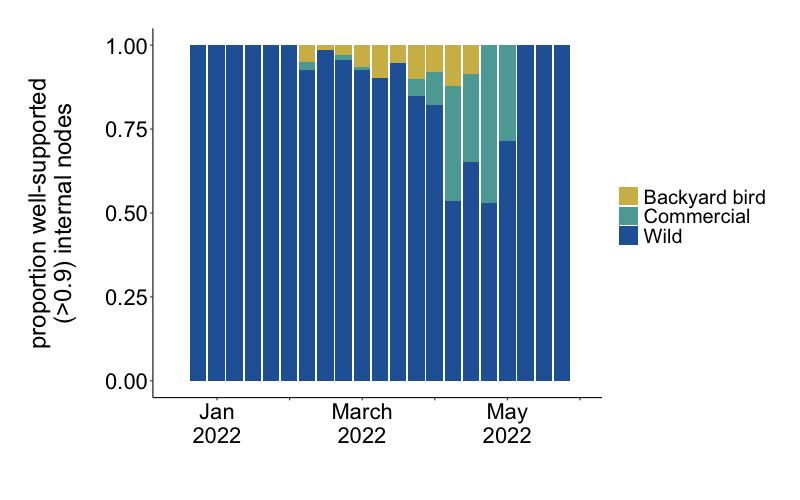

In [290]:
%%R -w 800 -h 500 -u px -i proportions_df,domestic_color,wild_color,byb_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

output_filename = paste("internal-node-probabilities-all-over-0.9-histogram.pdf", sep="")

p <- ggplot(data=proportions_df, aes(x=year, y=value, fill=variable), color=NA) +
    geom_bar(stat="identity")+
    labs(x="",y="proportion well-supported\n(>0.9) internal nodes\n")+
    #labs(x=paste("\nmigrations per lineage per year\n(",mig_direction,")",sep=""),y="density\n")+
     scale_color_manual(values=c(prop_domestic=domestic_color,prop_wild=wild_color,prop_byb=byb_color), labels=c(prop_domestic="Commercial",prop_wild="Wild",prop_byb="Backyard bird"))+
     scale_fill_manual(values=c(prop_domestic=domestic_color,prop_wild=wild_color,prop_byb=byb_color), labels=c(prop_domestic="Commercial",prop_wild="Wild",prop_byb="Backyard bird"))+
#     scale_y_continuous(breaks=seq(0,1,0.2), limits=c(0.8,1))+
    scale_x_continuous(breaks=seq(2022,2022.417,0.083), limits=c(2021.95,2022.417), labels=c("Jan\n2022","","March\n2022","","May\n2022",""))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,1,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "pdf", path = "figures", dpi = 300)
p

# Infer subtrees

In [32]:
def retrieve_subtrees(tree, traitName, division_order):
    

    tree.root.traits[traitName]='ancestor' ## give root node some trait value that's different from what the actual tree root has, so it registers as a switch

    tree_strings={division:[] for division in division_order}
    subtype_trees={division:[] for division in division_order}

    for k in sorted(tree.Objects,key=lambda x:x.height):
        kp=k.parent     # kp is the parent node of k

        ## get current node's (k) and its parent's (kp) trait states
        kloc=k.traits[traitName]   # kloc = trait of k; kc = trait of k; they are the same thing
        if traitName in k.parent.traits:  # if parent has a trait block, use that trait, else assign to ancestor
            kploc=kp.traits[traitName]     # kploc = trait of parental node
        else:
            kploc='ancestor'

        ## if states do not match
        if kloc!=kploc:      # if node and parental node do not have the same trait
            #N_children=len(k.leaves)
            traverse_condition=lambda w:w.traits[traitName]==kloc     # traverse tree for all nodes whose traitname = kc
            #print('subtree resulting from '+kploc+' > '+kloc+' switch, traversing within '+ kloc)

            subtree=tree.subtree(k,traverse_condition=traverse_condition) ## this function returns a new baltic object that contains a trait-traversed subtree, starting from node k, for as long as the traversal stays within the starting trait value state
            
            if subtree != None:
                subtree.traverse_tree()
                subtree.sortBranches()
                subtype_trees[kloc].append((kploc,subtree))
                    
    return(subtype_trees)

In [33]:
def plot_exploded_tree(subtype_trees, traitName, demes, colors, colors_to_plot, output_filename):    
    fig,ax1 = plt.subplots(1, figsize=(8,8),facecolor='w')

    axes = [ax1]
    tipSize=15
    oriSize = 50
    mpl.rcParams['font.size']=16
    cumulative_y=0
    branchWidth=0.5 ## default branch width

    # # this sets the vertical dashed lines on the tree
    dates = []
    for i in np.arange(2022.0,2022.45,0.083):
        dates.append(i)  
    #dates = dates[::2]

#     dates = [2021.75,2022,2022.25,2022.5]   
    [ax1.axvline(i,ls='--',lw=1,color='grey',zorder=0, alpha=0.5) for i in dates]


    x_attr=lambda k: k.absoluteTime
    c_func=lambda k: colors[k.traits[traitName]]
    s_func=lambda k: tipSize
    z_func=lambda k: 100

    su_func=lambda k: tipSize+10
    cu_func=lambda k: 'k'
    zu_func=lambda k: 99

    for deme in demes:
        
        subtype_trees[deme].reverse() # reverse the list so that subtrees are ordered oldest to newest

        for subtree in subtype_trees[deme]: ## iterate over trait values
            origin = subtree[0]
            loc_tree = subtree[1]

            y_attr=lambda k: k.y+cumulative_y

            loc_tree.plotTree(ax1,x_attr=x_attr,y_attr=y_attr,colour_function=c_func)
            loc_tree.plotPoints(ax1,x_attr=x_attr,y_attr=y_attr,size_function=s_func,
                                    colour_function=c_func,zorder_function=z_func)
            loc_tree.plotPoints(ax1,x_attr=x_attr,y_attr=y_attr,size_function=su_func,
                                    colour_function=cu_func,zorder_function=zu_func)

            oriC = colors[origin]
            if loc_tree.root.absoluteTime==None or type(loc_tree.root)==None:
                oriX=loc_tree.root.absoluteTime
                oriY=loc_tree.root.y+cumulative_y
            else:
                oriX=loc_tree.root.absoluteTime
                oriY=loc_tree.root.y+cumulative_y
            ax1.scatter(oriX,oriY,oriSize,facecolor=oriC,edgecolor='w',lw=branchWidth,zorder=200) ## add big circle at base of tree to indicate origin
            cumulative_y+=loc_tree.ySpan+5 ## increment y displacement

    # add in a legend
    han_list = []
    for key in colors_to_plot:
        marker = mlines.Line2D(range(1), range(1), color = colors[key], marker='o', markerfacecolor = colors[key], label = key.replace("_"," ").title().replace("Backyard Bird","Backyard\nBird").replace("Domestic","Commercial"), markersize = 8)
        han_list.append(marker)

    ax1.legend(handles = han_list, markerfirst = True, frameon=False, bbox_to_anchor=[-0.18, 0.15], loc=3, prop={'size': 20}, facecolor='w')
    ax1.xaxis.tick_bottom()
    ax1.yaxis.tick_left()

    [ax1.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]

    ax1.tick_params(axis='y',size=0)
    ax1.set_yticklabels([])
    ax1.set_ylim(-5,cumulative_y)
    ax1.set_xlim(2022.0,2022.45)

    ax1.set_xticks(dates)
    ax1.set_xticklabels(["Jan\n2022","Feb\n2022","March\n2022","April\n2022","May\n2022","June\n2022"], fontsize=20)
    #ax1.axes.get_xaxis().set_ticks([])

    fig.tight_layout()
    plt.gcf().subplots_adjust(right=0.88)
    plt.savefig(output_filename)

    plt.show()

In [34]:
division_order = ["Wild","Domestic","Backyard_bird"]
traitName = "domwildbyb"

# run this function to retrieve all of the transitions into Washington (i.e., all the Washington subtrees)
subtype_trees = retrieve_subtrees(tree, traitName, division_order)

# output the number of washington subtrees to dictionary
print(len(subtype_trees))

3


In [35]:
for s in subtype_trees: 
    print(s)
    print(len(subtype_trees[s]))

Wild
3
Domestic
39
Backyard_bird
34


In [36]:
# try instead, clustering into regions and plotting it that way; we could do: west, 2 midwests, 2 souths, northeast
colors = {"Domestic":"#5CA7A4", #"#5CA7A4", #green color
          "Wild":"#2664A5", 
          "nonhuman_mammal":"#B2313D",
          "Backyard_bird":"#D1BA56"
         }

uncertainty_color="#F6F6F6"

color_order_domwildbyb = ["Wild","Domestic","Backyard_bird"]

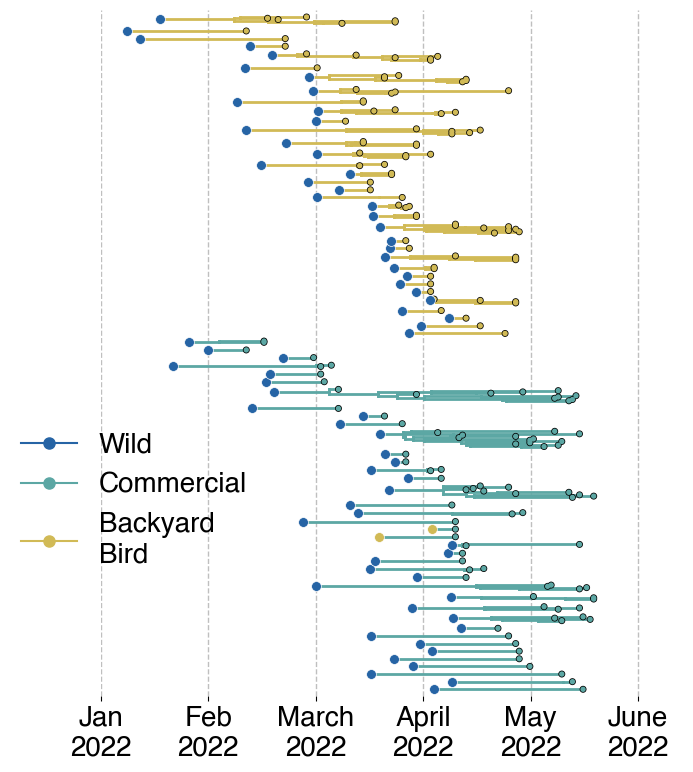

In [309]:
demes = ["Domestic","Backyard_bird"]
output_filename = "figures/wild-rarefaction-dta-exploded-trees-" + todays_date + ".pdf"

plot_exploded_tree(subtype_trees, traitName, demes, colors, color_order_domwildbyb, output_filename)

In [37]:
def return_height_oldest_tip(subtree):
    all_tipDates = []
    
    for k in tree.Objects: 
        if k.branchType == "leaf":
            tipDate = k.absoluteTime
            all_tipDates.append(tipDate)
            
    date_oldest_tip = min(all_tipDates)
    return(date_oldest_tip)

In [38]:
def return_lead_times(subtree):
    root = subtree.root.absoluteTime    
    oldest_tip = return_height_oldest_tip(subtree)
    lead_time = oldest_tip - root
    
    return(lead_time, root)

In [119]:
lead_times_df = pd.DataFrame()

for host in ["Domestic","Backyard_bird"]:
    for s in subtype_trees[host]:
        tree = s[1]
        lead_time, root = return_lead_times(tree)
        #print(tree, leaves_in_subtree)

        local_df = pd.DataFrame({"host":host,"root":[root], "lead_time":[lead_time]})
        lead_times_df = pd.concat([lead_times_df, local_df])
        
lead_times_df["days"] = lead_times_df["lead_time"]*365
lead_times_df["days_int"] = lead_times_df["days"].astype(int)
lead_times_df

,host,root,lead_time,days,days_int
0,Domestic,2022.068171,0.057856,21.117438,21
0,Domestic,2022.082825,0.029504,10.769020,10
0,Domestic,2022.140879,0.023505,8.579286,8
0,Domestic,2022.055540,0.114323,41.727728,41
0,Domestic,2022.130727,0.039136,14.284798,14
...,...,...,...,...,...
0,Backyard_bird,2022.253953,0.003581,1.307097,1
0,Backyard_bird,2022.232997,0.030017,10.956273,10
0,Backyard_bird,2022.269332,0.012860,4.693834,4
0,Backyard_bird,2022.247653,0.045498,16.606692,16


In [124]:
group1 = lead_times_df[lead_times_df['host']=='Domestic']
group2 = lead_times_df[lead_times_df['host']=='Backyard_bird']

print(np.mean(group1["days"]))
print(np.mean(group2["days"]))
print(np.median(group1["days"]))
print(np.median(group2["days"]))


print(np.mean(group1["root"]))
print(np.mean(group2["root"]))

print(np.median(group1["root"]))
print(np.median(group2["root"]))


#perform independent two sample t-test
print(ttest_ind(group1['days'], group2['days']))
print(ttest_ind(group1['root'], group2['root']))

23.692407668115166
16.805685871340188
21.681602247566616
12.15786160874245
2022.203582444745
2022.1750690314564
2022.2145709527465
2022.1760263699932
Ttest_indResult(statistic=2.217684578234592, pvalue=0.029777635050437647)
Ttest_indResult(statistic=1.9699857788519362, pvalue=0.052741296096984205)


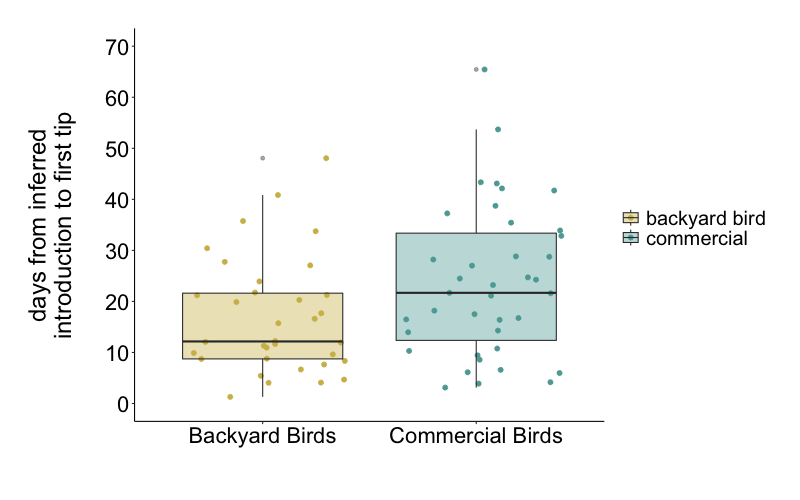

In [70]:
%%R -w 800 -h 500 -u px -i lead_times_df,todays_date,byb_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

output_filename = paste("lead-times.pdf", sep="")

p <- ggplot(data=lead_times_df, aes(y=days, x=host, fill=host)) +
    geom_jitter(aes(fill=host, color=host), size=2)+
    geom_boxplot(alpha=0.4)+
    #geom_histogram(stat="count", position = position_dodge2(width = 1, preserve = "single"), binwidth=10)+
    #labs(x="\ndate",y="proportion transitions\n")+
    labs(x="",y="days from inferred\nintroduction to first tip\n")+
    scale_color_manual(values=c(Domestic=domestic_color,Backyard_bird=byb_color), labels=c(Domestic="commercial",Backyard_bird="backyard bird"))+
    scale_fill_manual(values=c(Domestic=domestic_color,Backyard_bird=byb_color), labels=c(Domestic="commercial",Backyard_bird="backyard bird"))+
    scale_y_continuous(breaks=seq(0,70,10), limits=c(0,70))+
    scale_x_discrete(labels=c(Backyard_bird="Backyard Birds",Domestic="Commercial Birds"))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,1,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "pdf", path = "figures", dpi = 300)
p

In [77]:
lead_times_df

,host,lead_time,days,days_int
0,Domestic,0.115430,42.131980,42
0,Domestic,0.092885,33.902894,33
0,Domestic,0.147140,53.706066,53
0,Domestic,0.089996,32.848525,32
0,Domestic,0.097051,35.423752,35
...,...,...,...,...
0,Backyard_bird,0.026379,9.628305,9
0,Backyard_bird,0.027124,9.900293,9
0,Backyard_bird,0.111885,40.838057,40
0,Backyard_bird,0.092466,33.750163,33


In [86]:
%%R -w 800 -h 500 -u px -i lead_times_df,todays_date,byb_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

output_filename = paste("lead-times-histogram.pdf", sep="")
lead_times_df$days = as.numeric(as.character(lead_times_df$days))
#my_dataframe$column1 = as.numeric(as.character(my_dataframe$column1)) 

p <- ggplot(data=lead_times_df, aes(x=days)) +
    geom_histogram()+
    #geom_histogram(stat="count", position = position_dodge2(width = 1, preserve = "single"), binwidth=10)+
    #labs(x="\ndate",y="proportion transitions\n")+
    labs(x="",y="days from inferred\nintroduction to first tip\n")+
    scale_color_manual(values=c(Domestic=domestic_color,Backyard_bird=byb_color), labels=c(Domestic="commercial",Backyard_bird="backyard bird"))+
    scale_fill_manual(values=c(Domestic=domestic_color,Backyard_bird=byb_color), labels=c(Domestic="commercial",Backyard_bird="backyard bird"))+
    scale_y_continuous(breaks=seq(0,70,10), limits=c(0,70))+
    scale_x_discrete(labels=c(Backyard_bird="Backyard Birds",Domestic="Commercial Birds"))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,1,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 6, device = "pdf", path = "figures", dpi = 300)
p

Error in `geom_histogram()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires a continuous x aesthetic
✖ the x aesthetic is discrete.
ℹ Perhaps you want `stat="count"`?
Run `rlang::last_trace()` to see where the error occurred.

Error in geom_histogram() : 
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires a continuous x aesthetic
✖ the x aesthetic is discrete.
ℹ Perhaps you want `stat="count"`?


RInterpreterError: Failed to parse and evaluate line '# this sets the size of the plot...otherwise, it will go off the page\nrequire(ggplot2)\nlibrary(ggplot2)\nlibrary(RColorBrewer)\n\noutput_filename = paste("lead-times-histogram.pdf", sep="")\nlead_times_df$days = as.numeric(as.character(lead_times_df$days))\n#my_dataframe$column1 = as.numeric(as.character(my_dataframe$column1)) \n\np <- ggplot(data=lead_times_df, aes(x=days)) +\n    geom_histogram()+\n    #geom_histogram(stat="count", position = position_dodge2(width = 1, preserve = "single"), binwidth=10)+\n    #labs(x="\\ndate",y="proportion transitions\\n")+\n    labs(x="",y="days from inferred\\nintroduction to first tip\\n")+\n    scale_color_manual(values=c(Domestic=domestic_color,Backyard_bird=byb_color), labels=c(Domestic="commercial",Backyard_bird="backyard bird"))+\n    scale_fill_manual(values=c(Domestic=domestic_color,Backyard_bird=byb_color), labels=c(Domestic="commercial",Backyard_bird="backyard bird"))+\n    scale_y_continuous(breaks=seq(0,70,10), limits=c(0,70))+\n    scale_x_discrete(labels=c(Backyard_bird="Backyard Birds",Domestic="Commercial Birds"))+\n    theme(panel.grid.major=element_line(colour=NA,size=NA))+    \n    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    \n    theme(strip.background = element_rect(colour=NA, fill=NA))+\n    theme(axis.line.x=element_line(colour="black"))+\n    theme(axis.line.y=element_line(colour="black"))+\n    theme(axis.title=element_text(size=24, vjust=5))+\n    theme(axis.text.y=element_text(size=22, colour="black"))+\n    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+\n    theme(legend.text=element_text(size=20))+\n    theme(legend.title=element_blank())+\n    theme(panel.margin=unit(1, "lines"))+\n    theme(plot.margin=unit(c(1,1,1,1),"cm"))+\n    theme(legend.key.size=unit(0.7, "cm"))+\n    theme(panel.background=element_rect(fill=NA))+\n    theme(legend.key=element_rect(fill=NA))\n    ##theme(legend.position = c(legend_x, legend_y))\n\nggsave(output_filename, width = 10, height = 6, device = "pdf", path = "figures", dpi = 300)\np\n'.
R error message: 'Error in geom_histogram() : \nℹ Error occurred in the 1st layer.\nCaused by error in `setup_params()`:\n! `stat_bin()` requires a continuous x aesthetic\n✖ the x aesthetic is discrete.\nℹ Perhaps you want `stat="count"`?'

In [315]:
def return_total_leaves_in_subtree(subtree):
    total_leaves = 0
    all_leaves = []
    for k in subtree.Objects:
        if k.branchType == "leaf":
            total_leaves+=1 
            all_leaves.append(k.name)
    return(total_leaves, all_leaves)

In [317]:
clusters_df = pd.DataFrame()

for host in ["Domestic","Backyard_bird"]:
    print(host)
    for s in subtype_trees[host]:
        tree = s[1]
        leaves_in_subtree, leaf_names = return_total_leaves_in_subtree(tree)
        print(leaves_in_subtree, leaf_names)

        local_df = pd.DataFrame({"host":host,"cluster_size":[leaves_in_subtree]})
        clusters_df = pd.concat([clusters_df, local_df])
        
clusters_df

Domestic
1 ['EPI_ISL_16244022|A/chicken/Wyoming/22-015810-001-original/2022|2022-05-17|Domestic']
1 ['EPI_ISL_13117290|A/Chicken/BC/FAV-0460-OS/2022|2022-05-14|Domestic']
1 ['EPI_ISL_16240885|A/chicken/Wisconsin/22-014859-001-original/2022|2022-05-11|Domestic']
1 ['EPI_ISL_16171498|A/chicken/Illinois/22-013392-001-original/2022|2022-05-02|Domestic']
1 ['EPI_ISL_16171494|A/chicken/Michigan/22-013224-001-original/2022|2022-04-29|Domestic']
1 ['EPI_ISL_16171513|A/chicken/South_Dakota/22-013554-001-original/2022|2022-04-29|Domestic']
1 ['EPI_ISL_16171467|A/chicken/Colorado/22-013057-001-original/2022|2022-04-28|Domestic']
1 ['EPI_ISL_16171461|A/chicken/Michigan/22-012977-001-original/2022|2022-04-26|Domestic']
1 ['EPI_ISL_16171456|A/chicken/Indiana/22-012933-001-original/2022|2022-04-23|Domestic']
4 ['EPI_ISL_16244005|A/chicken/Idaho/22-015408-001-original/2022|2022-05-17|Domestic', 'EPI_ISL_16240223|A/chicken/Idaho/22-014275-001-original/2022|2022-05-09|Domestic', 'EPI_ISL_16244018|A/chic

,host,cluster_size
0,Domestic,1
0,Domestic,1
0,Domestic,1
0,Domestic,1
0,Domestic,1
...,...,...
0,Backyard_bird,6
0,Backyard_bird,1
0,Backyard_bird,1
0,Backyard_bird,1


In [312]:
byb_color="#D1BA56"
wild_color="#2664A5"
mammal_color="#B2313D"
commercial_color="#5CA7A4"

In addition: Warning message:
In geom_histogram(stat = "count", position = position_dodge2(width = 1,  :
  Ignoring unknown parameters: `binwidth`, `bins`, and `pad`


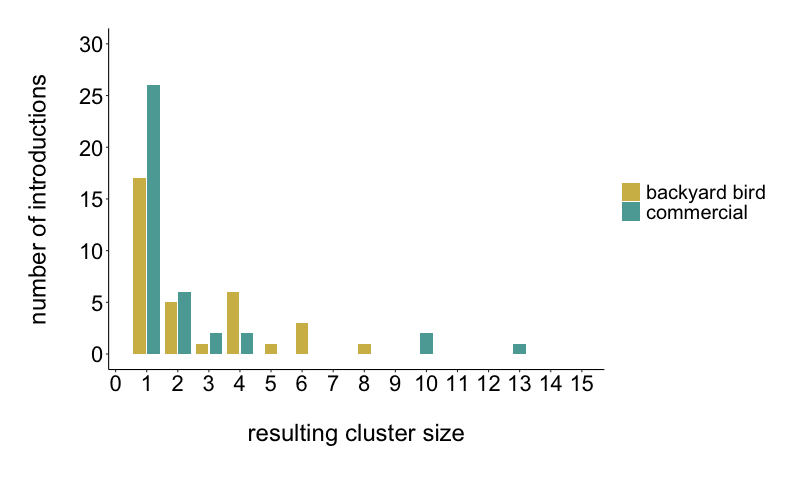

In [314]:
%%R -w 800 -h 500 -u px -i clusters_df,todays_date,byb_color,wild_color,mammal_color,commercial_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

output_filename = paste("cluster_sizes.pdf", sep="")

p <- ggplot(data=clusters_df, aes(x=cluster_size, fill=host)) +
    geom_histogram(stat="count", position = position_dodge2(width = 1, preserve = "single"), binwidth=1)+
    #labs(x="\ndate",y="proportion transitions\n")+
    labs(x="\nresulting cluster size\n",y="number of introductions\n")+
    scale_color_manual(values=c(Domestic=commercial_color,Backyard_bird=byb_color), labels=c(Domestic="commercial",Backyard_bird="backyard bird"))+
    scale_fill_manual(values=c(Domestic=commercial_color,Backyard_bird=byb_color), labels=c(Domestic="commercial",Backyard_bird="backyard bird"))+
    scale_y_continuous(breaks=seq(0,30,5), limits=c(0,30))+
    scale_x_continuous(breaks=seq(0,15,1), limits=c(0.5,15))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,1,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 12, height = 6, device = "pdf", path = "figures", dpi = 300)
p